# Esercizio 1.3

Simulazione dell'esperimento di Buffon.

Un ago di lunghezza $L$ è fatto cadere in modo casuale su un piano orizzontale in cui vi sono delle linee parallele a distanza $d$ l'una dall'altra ($d > L$); la probabilità che l'ago intersechi una di queste linee è $P = 2L\,/\,\pi d$. Si può quindi calcolare il valore approssimato di $\pi$ da $N_{thr}$ lanci dell'ago contando il numero di volte $N_{hit}$ in cui una delle linee è intersecata:

$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
import scipy.stats
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import os
import subprocess

M = 10**5                # Total number of throws
N = 100                 # Number of blocks
L = int(M/N)             # Number of throws in each block, please use for M a multiple of N\

arguments = str(M)+" "+str(N)
subprocess.run("make clean", shell=True, stdout=subprocess.PIPE)
subprocess.run('make esegui ARGS="%s"' % arguments, shell=True)

CompletedProcess(args='make esegui ARGS="100000 100"', returncode=0)

Il pavimento corrisponde a linee parallele successive a distanza $d$; per semplificare il calcolo si può considerare soltanto la prima linea, andando quindi a simulare i lanci tra l'origine e d.

L'ago viene "fatto cadere" in modo random estraendo casualmente la posizione del suo centro in $[0,d]$ e la sua orientazione rispetto alla verticale. Ogni ago è quindi descritto da una coordinata $x$ (la sua coordinata $y$ è ininfluente ai fini del calcolo) e dall'orientazione $\theta$.

In [2]:
x, y, theta = (np.genfromtxt("pos.dat", usecols=i, autostrip=True, skip_footer=900) for i in range(3))

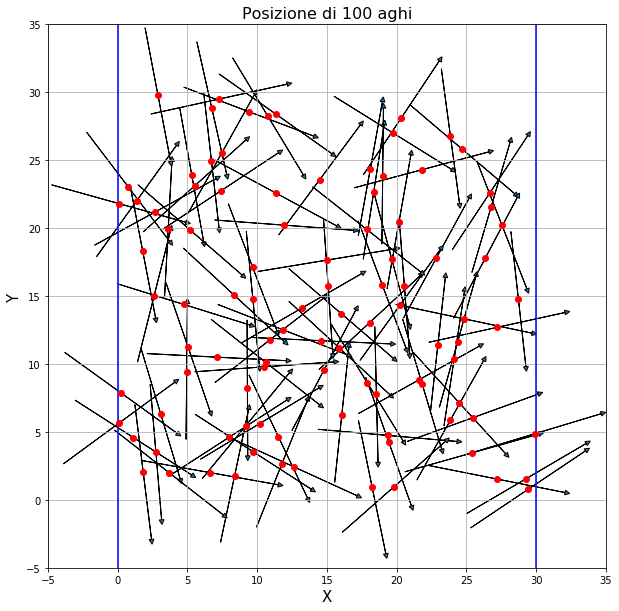

In [3]:
fig = plt.figure(figsize=(10, 10))
width = 0.001
h_w = 350*width
l = 10.

for i in range(len(x)):
    plt.plot(x[i], y[i],'ro')
    lenx = (l/2.)*np.sin(theta[i]) 
    leny = (l/2.)*np.cos(theta[i])
    plt.arrow((x[i]-lenx), (y[i]-leny), 2*lenx, 2*leny, width=width, head_width=h_w, head_length=h_w)

plt.grid(True)  
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)
plt.vlines(0,-20,40,'b')
plt.vlines(30,-20,40,'b')
plt.xlim((-l/2.,30+l/2.))
plt.ylim((-l/2.,30+l/2.))
plt.title("Posizione di 100 aghi", fontsize=16)
plt.show()

Utilizzando un numero di lanci $M = 10^5$ e un numero di blocchi $N = 100 $ si ottiene una buona convergenza.

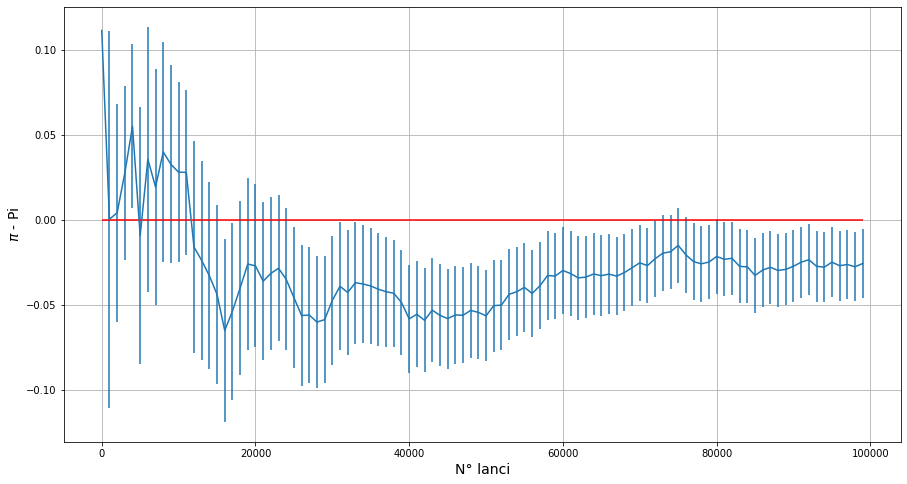

In [4]:
fig = plt.figure(figsize=(15, 8))
pi, err = (np.genfromtxt("pi.txt", usecols=i, autostrip=True) for i in range(2))
x = np.arange(N)*L
plt.errorbar(x,-pi+math.pi,yerr=err)
plt.hlines(0, 0,L*(N-1), colors='r', linestyles='solid')
plt.xlabel('N° lanci', fontsize = 14)
plt.ylabel(r'$\pi$ - Pi', fontsize = 14)
plt.grid(True)
plt.show()

Con un numero di lanci $M = 10^7$ e un numero di blocchi $N = 100 $ la stima di $\pi$ migliora sensibilmente.

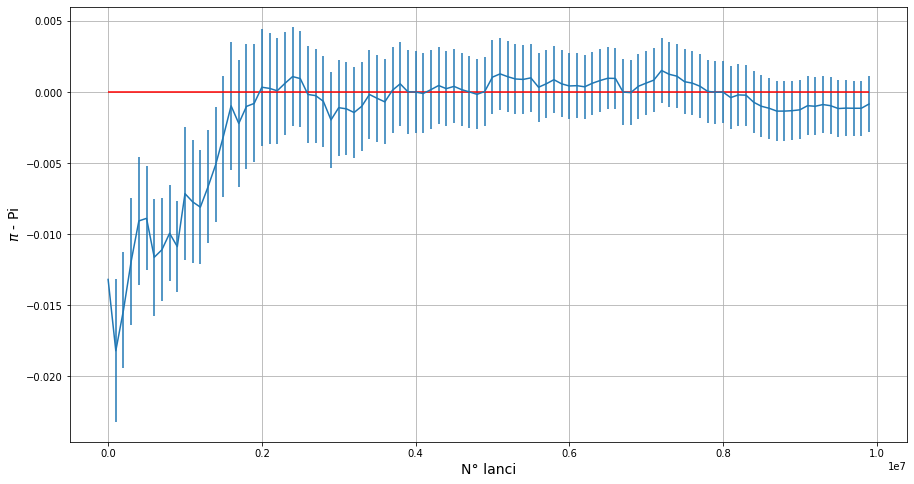

In [5]:
M = 10**7       # Total number of throws
N = 100         # Number of blocks
L = int(M/N)    # Number of throws in each block, please use for M a multiple of N\

arguments = str(M)+" "+str(N)
subprocess.run("make clean", shell=True, stdout=subprocess.PIPE)
subprocess.run('make esegui ARGS="%s"' % arguments, shell=True)
fig = plt.figure(figsize=(15, 8))
pi, err = (np.genfromtxt("pi.txt", usecols=i, autostrip=True) for i in range(2))
x = np.arange(N)*L
plt.errorbar(x,-pi+math.pi,yerr=err)
plt.hlines(0, 0,L*(N-1), colors='r', linestyles='solid')
plt.xlabel('N° lanci', fontsize = 14)
plt.ylabel(r'$\pi$ - Pi', fontsize = 14)
plt.grid(True)
plt.show()